<a href="https://colab.research.google.com/github/ruturaj0626/DeepLearning/blob/main/MINST_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks

## Import packages

In [165]:
from keras.datasets import mnist
from tensorflow.keras.utils import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense # ensures that its a full connected layer

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [166]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data() # fixed format

In [167]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [168]:
xtrain[0].shape

(28, 28)

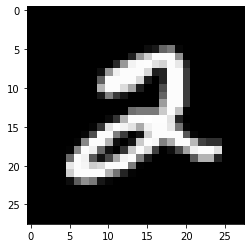

In [169]:
plt.imshow(xtrain[5],cmap='gray')

In [170]:
ytrain[5]

2

## Preprocessing the image data

In [171]:
image_height,image_width = 28,28

In [172]:
xtrain = xtrain.reshape(60000,image_height*image_width)
xtest = xtest.reshape(10000,image_height*image_width)
print(xtrain.shape)
print(xtest.shape)

(60000, 784)
(10000, 784)


In [173]:
xtrain = xtrain.astype(float)
xtest = xtest.astype(float)
print(xtrain[5])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  13.  25. 100. 122.   7.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  33.
 151. 208. 252. 252. 252. 146.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

In [174]:
xtrain = xtrain / 255.0 # so we can have all array in between 1 to 0 
xtest = xtest /  255.0

In [175]:
print(xtrain[5])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [176]:
print(ytrain.shape)
print(ytest.shape)

(60000,)
(10000,)


In [177]:
ytrain = to_categorical(ytrain,10)
ytest = to_categorical(ytest,10)

In [178]:
print(ytrain.shape)
print(ytest.shape)

(60000, 10)
(10000, 10)


## Build a model

In [179]:
model = Sequential()

In [180]:
model.add(Dense(512,activation='relu',input_shape=(784,))) # Layer 1 , 512 are the output nodes,784 are pixels 
model.add(Dense(512,activation='relu')) # layer 2 , no need for input node as keras takes care of it 
model.add(Dense(10,activation='softmax')) # output of 10 nodes because we want output from one of the 10 

## Compile the model

In [181]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [182]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 dense_21 (Dense)            (None, 512)               262656    
                                                                 
 dense_22 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [183]:
# pixels * nodes + bias 
784 * 512 + 512 

#   Layer (type)                Output Shape              Param #   
#   =================================================================
#   dense (Dense)               (None, 512)               401920    



401920

In [184]:
515*512+512

264192

In [185]:
512*10+10

5130

## Train the model

In [186]:
history = model.fit(xtrain,ytrain,epochs=20,validation_data=(xtest,ytest))

Epoch 1/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1833 - accuracy: 0.9440 - val_loss: 0.0944 - val_accuracy: 0.9708
Epoch 2/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0805 - accuracy: 0.9751 - val_loss: 0.0826 - val_accuracy: 0.9752
Epoch 3/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0550 - accuracy: 0.9822 - val_loss: 0.0690 - val_accuracy: 0.9811
Epoch 4/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0413 - accuracy: 0.9870 - val_loss: 0.0710 - val_accuracy: 0.9807
Epoch 5/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0335 - accuracy: 0.9901 - val_loss: 0.0982 - val_accuracy: 0.9767
Epoch 6/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0285 - accuracy: 0.9906 - val_loss: 0.0863 - val_accuracy: 0.9796
Epoch 7/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0258 - accuracy: 0.9918 - val_loss: 0.1042 -

## What is the accuracy of the model?

### Plot the accuracy of the training model

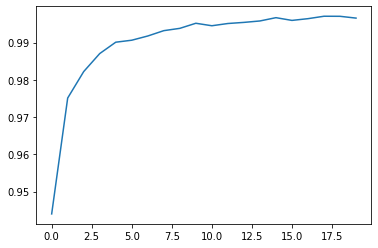

In [187]:
plt.plot(history.history['accuracy'])

### Plot the accuracy of training and validation set

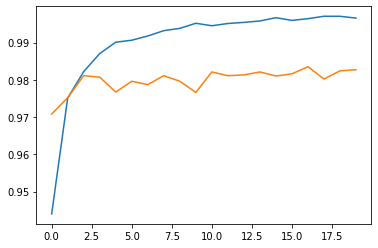

In [188]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

### Accuracy of training and validation with loss

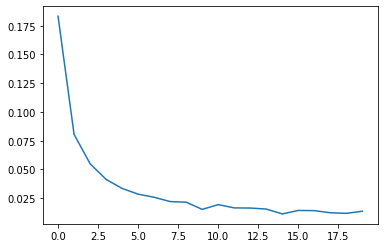

In [189]:
plt.plot(history.history['loss'])

## Run a prediction

In [190]:
score = model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 4ms/step - loss: 0.1274 - accuracy: 0.9827


In [191]:
score

[0.1274230033159256, 0.982699990272522]